# Reviews Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
df_reviews = pd.read_csv('Reviews.csv')

In [3]:
df_reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


**1)      Extract only those two columns from the data set.**

In [4]:
df = df_reviews[['Score', 'Text']]

In [5]:
df

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...
...,...,...
568449,5,Great for sesame chicken..this is a good if no...
568450,2,I'm disappointed with the flavor. The chocolat...
568451,5,"These stars are small, so you can give 10-15 o..."
568452,5,These are the BEST treats for training and rew...


**2)      Find how many reviews are labeled as 1, as 2, as 3, etc. and plot the bar chart showing these counts.**

In [6]:
counts = df['Score'].value_counts()
counts

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

Text(0, 0.5, 'Count')

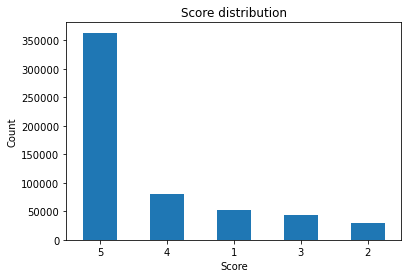

In [7]:
counts.plot(kind= 'bar')
plt.xticks(rotation = 0)
plt.title('Score distribution')
plt.xlabel('Score')
plt.ylabel('Count')

**3)      Preprocess the text data by removing stop words, punctuation, etc.**

In [8]:
X = df['Text']


In [9]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

In [10]:
stop = stopwords.words('english')
negative_words = ['no','nor','not',"can'", 'don',"don't",'ain','aren',"aren't",'couldn',
                  'couldn',"couldn't",'didn',"didn't",'doesn',"doesn't",
                  'hadn',"hadn't",'hasn',"hasn't",'haven',"haven't",'isn',
                  "isn't",'mightn',"mightn't",'mustn',"mustn't",'needn',
                  "needn't", 'shan',"shan't",'shouldn',"shouldn't",'wasn',
                  "wasn't",'weren',"weren't",'won',"won't",'wouldn',"wouldn't"]

new_stop = []
for w in stop:
    if w not in negative_words:
        new_stop.append(w)
new_stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [11]:
punct = string.punctuation
wnl = WordNetLemmatizer()

In [12]:
def clean(doc):
    stop_free = ' '.join([i for i in doc.lower().split() if i not in new_stop])
    punct_free= ''.join(ch for ch in stop_free if ch not in punct)
    normalized = ' '.join(wnl.lemmatize(word) for word in punct_free.split())
    return normalized

In [13]:
X_reviews = [clean(doc) for doc in X]

**4)      Use CountVectorizer or TfidfVectorizer to build the bag-of-words model.**

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(max_features = 1000, min_df = 7, max_df = 0.8)
X_vec = tfidf_vec.fit_transform(X_reviews)

**5)      Define X (features) and y (labels) for a supervised machine learning model.**

In [15]:
X = X_vec
y = df['Score'] 

**6)      Split the data set into training and testing.**

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 45)

**7)      Use any multiclass classifier to classify the reviews in the training set according to their labels (1, 2, 3, 4, 5).**

In [55]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators= 5)
forest_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5)

**8)      What is the accuracy of your classifier on the testing data?**

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [58]:
y_predictions = forest_model.predict(X_test)

In [59]:
print('Accuracy score:', forest_model.score(X_test, y_test))

Accuracy score: 0.7663322328878777


In [61]:
print(confusion_matrix(y_test, y_predictions))

[[  9711    561    587    800   4092]
 [  1423   3696    564    655   2556]
 [  1217    431   5703   1303   4160]
 [   994    423   1023  11179  10433]
 [  2412    712   1448   4055 100399]]


In [62]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           1       0.62      0.62      0.62     15751
           2       0.63      0.42      0.50      8894
           3       0.61      0.45      0.52     12814
           4       0.62      0.46      0.53     24052
           5       0.83      0.92      0.87    109026

    accuracy                           0.77    170537
   macro avg       0.66      0.57      0.61    170537
weighted avg       0.75      0.77      0.75    170537



**9)      You can also reduce the problem to binary classification, by combining scores 1, 2, 3, 4, and 5 into just two classes (0, 1). Define a new column (maybe call it “Positivity”), so that reviews with scores 1, 2, 3 are labeled as “0” and scores 4 and 5 are labeled as “1”.  This way you will have only two labels “0” (bad review) and “1” (good review).**

In [22]:
positivity = []
for i in df['Score']:
    if i <= 3:
        positivity.append(0)
    else:
        positivity.append(1)

df['Positivity'] = positivity

<ipython-input-22-51a6bd2b2ba8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Positivity'] = positivity


**10)   Split the data set into training and testing.**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, df['Positivity'], test_size = 0.3, random_state = 45)

**11)   Use any binary classifier to separate “bad” and “good” reviews.**

In [24]:
from sklearn.linear_model import LogisticRegression
binary_model = LogisticRegression(max_iter = 10000)
binary_model.fit(X_train, y_train)
y_pred = binary_model.predict(X_test)

**12)   What is the accuracy of your classifier on the testing data?**

In [25]:
print('Accuracy score:', binary_model.score(X_test, y_test))

Accuracy score: 0.871318247653002


In [28]:
print(confusion_matrix(y_test, y_pred))

[[ 22353  15106]
 [  6839 126239]]


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.60      0.67     37459
           1       0.89      0.95      0.92    133078

    accuracy                           0.87    170537
   macro avg       0.83      0.77      0.80    170537
weighted avg       0.87      0.87      0.87    170537

